Dataset shape: (520, 17)

Columns: Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

Class distribution:
 class
Positive    320
Negative    200
Name: count, dtype: int64

Balanced distribution:
 class
Negative    200
Positive    200
Name: count, dtype: int64

Target mapping: {'Negative': np.int64(0), 'Positive': np.int64(1)}

Train size: (320, 8)
Test size: (80, 8)

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        38
           1       1.00      0.90      0.95        42

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



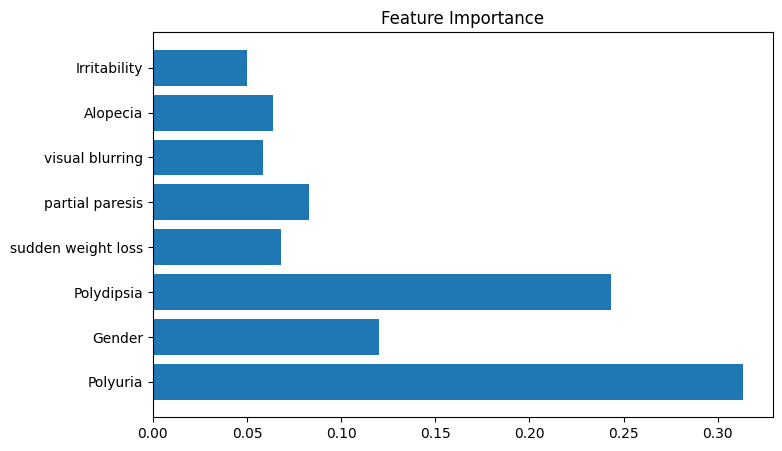


Saved model + encoders successfully!

Manual Case Prediction: Positive
Confidence: 0.6065316350316349


c:\Users\NEHA NIKITHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\NEHA NIKITHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [4]:
# ================= IMPORTS =================
import pandas as pd
import numpy as np
import pickle
import joblib
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ================= LOAD DATASET =================
df = pd.read_csv("diabetes_data_upload.csv")

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns)
print("\nClass distribution:\n", df['class'].value_counts())
df.head()

# ================= BALANCE DATASET =================
df_positive = df[df['class'] == 'Positive']
df_negative = df[df['class'] == 'Negative']

df_positive_sampled = df_positive.sample(len(df_negative), random_state=42)

df_balanced = pd.concat([df_positive_sampled, df_negative])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nBalanced distribution:\n", df_balanced['class'].value_counts())

# ================= FEATURE SELECTION (MATCH API) =================
features = [
 'Polyuria','Gender','Polydipsia',
 'sudden weight loss','partial paresis',
 'visual blurring','Alopecia','Irritability'
]

X = df_balanced[features].copy()
y = df_balanced['class'].copy()

# ================= ENCODE TARGET =================
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

print("\nTarget mapping:",
      dict(zip(target_encoder.classes_,
               target_encoder.transform(target_encoder.classes_))))

# ================= ENCODE FEATURES =================
encoder_dict = {}

for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoder_dict[col] = le

X.head()

# ================= TRAIN TEST SPLIT =================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain size:", X_train.shape)
print("Test size:", X_test.shape)

# ================= MODEL TRAINING =================
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

# ================= EVALUATION =================
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ================= FEATURE IMPORTANCE =================
importance = model.feature_importances_

plt.figure(figsize=(8,5))
plt.barh(features, importance)
plt.title("Feature Importance")
plt.show()

# ================= SAVE FILES =================
joblib.dump(model, "diabetes_model.pkl")
pickle.dump(encoder_dict, open("encoder.pkl", "wb"))
pickle.dump(target_encoder, open("target_encoder.pkl", "wb"))

print("\nSaved model + encoders successfully!")

# ================= TEST CASE 1 =================
test_case = {
 'Polyuria': 'No',
 'Gender': 'Female',
 'Polydipsia': 'No',
 'sudden weight loss': 'No',
 'partial paresis': 'No',
 'visual blurring': 'No',
 'Alopecia': 'No',
 'Irritability': 'No'
}

encoded = []
for col in features:
    le = encoder_dict[col]
    encoded.append(le.transform([test_case[col]])[0])

pred = model.predict([encoded])
prob = model.predict_proba([encoded])[0][1]

print("\nManual Case Prediction:",
      target_encoder.inverse_transform(pred)[0])
print("Confidence:", prob)

In [5]:
print(model.predict_proba([encoded]))

[[0.39346836 0.60653164]]


c:\Users\NEHA NIKITHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
